In [1]:
import pandas as pd

fred = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
fred.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
fred.shape

(41188, 21)

In [3]:
fred.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
f_dup = fred.duplicated().sum()
print(f_dup)

12


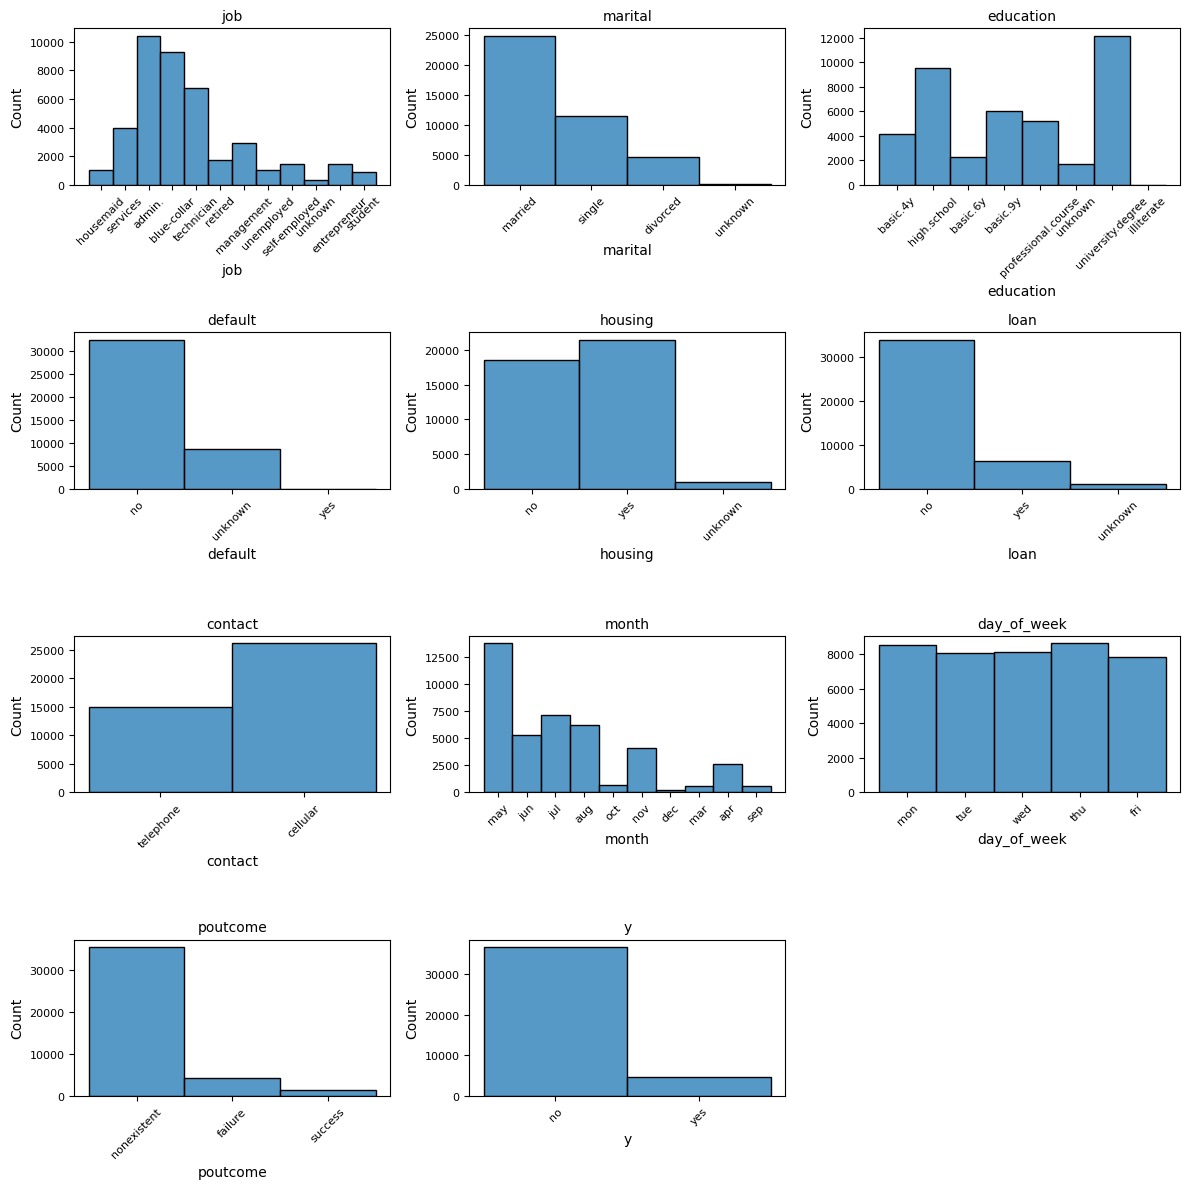

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


columns_to_plot = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

fig, axes = plt.subplots(4, 3, figsize=(12, 12)) 
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.histplot(ax=axes[i], data=fred, x=column)
    axes[i].set_title(column, fontsize=10) 
    axes[i].tick_params(axis='x', rotation=45, labelsize=8) 
    axes[i].tick_params(axis='y', labelsize=8) 

if len(columns_to_plot) < len(axes):
    fig.delaxes(axes[len(columns_to_plot)])

plt.tight_layout()
plt.show()

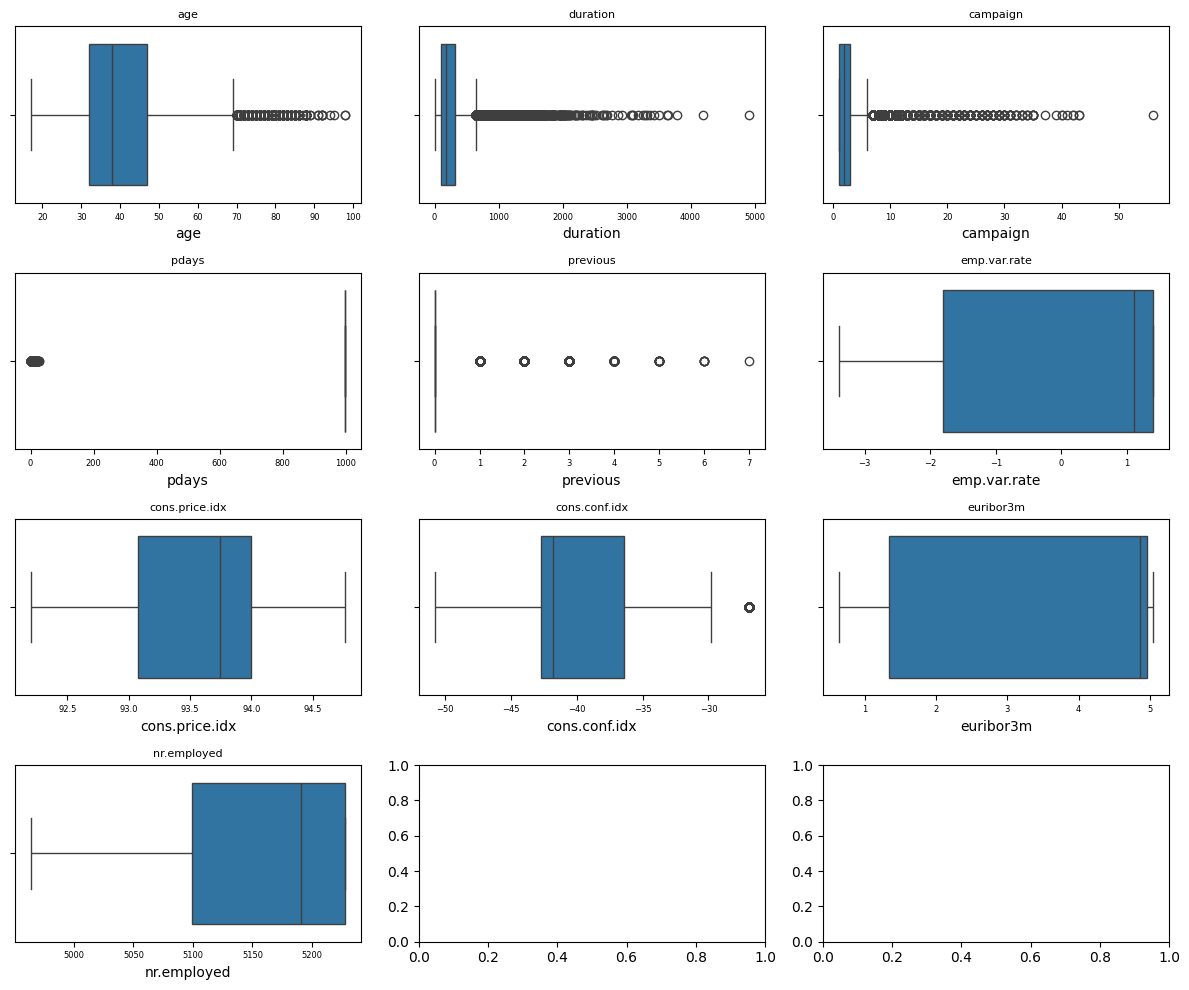

In [6]:
columns_to_plot = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

fig, axes = plt.subplots(4, 3, figsize=(12, 10)) # adjust figsize to change overall size
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    if i < len(columns_to_plot): #prevent index error
        sns.boxplot(ax=axes[i], data=fred, x=column)
        axes[i].set_title(column, fontsize=8) # smaller title
        axes[i].tick_params(axis='x', labelsize=6) # smaller x labels
        axes[i].tick_params(axis='y', labelsize=6) # smaller y labels
    else:
        fig.delaxes(axes[i]) # remove unused axes

plt.tight_layout()
plt.show()

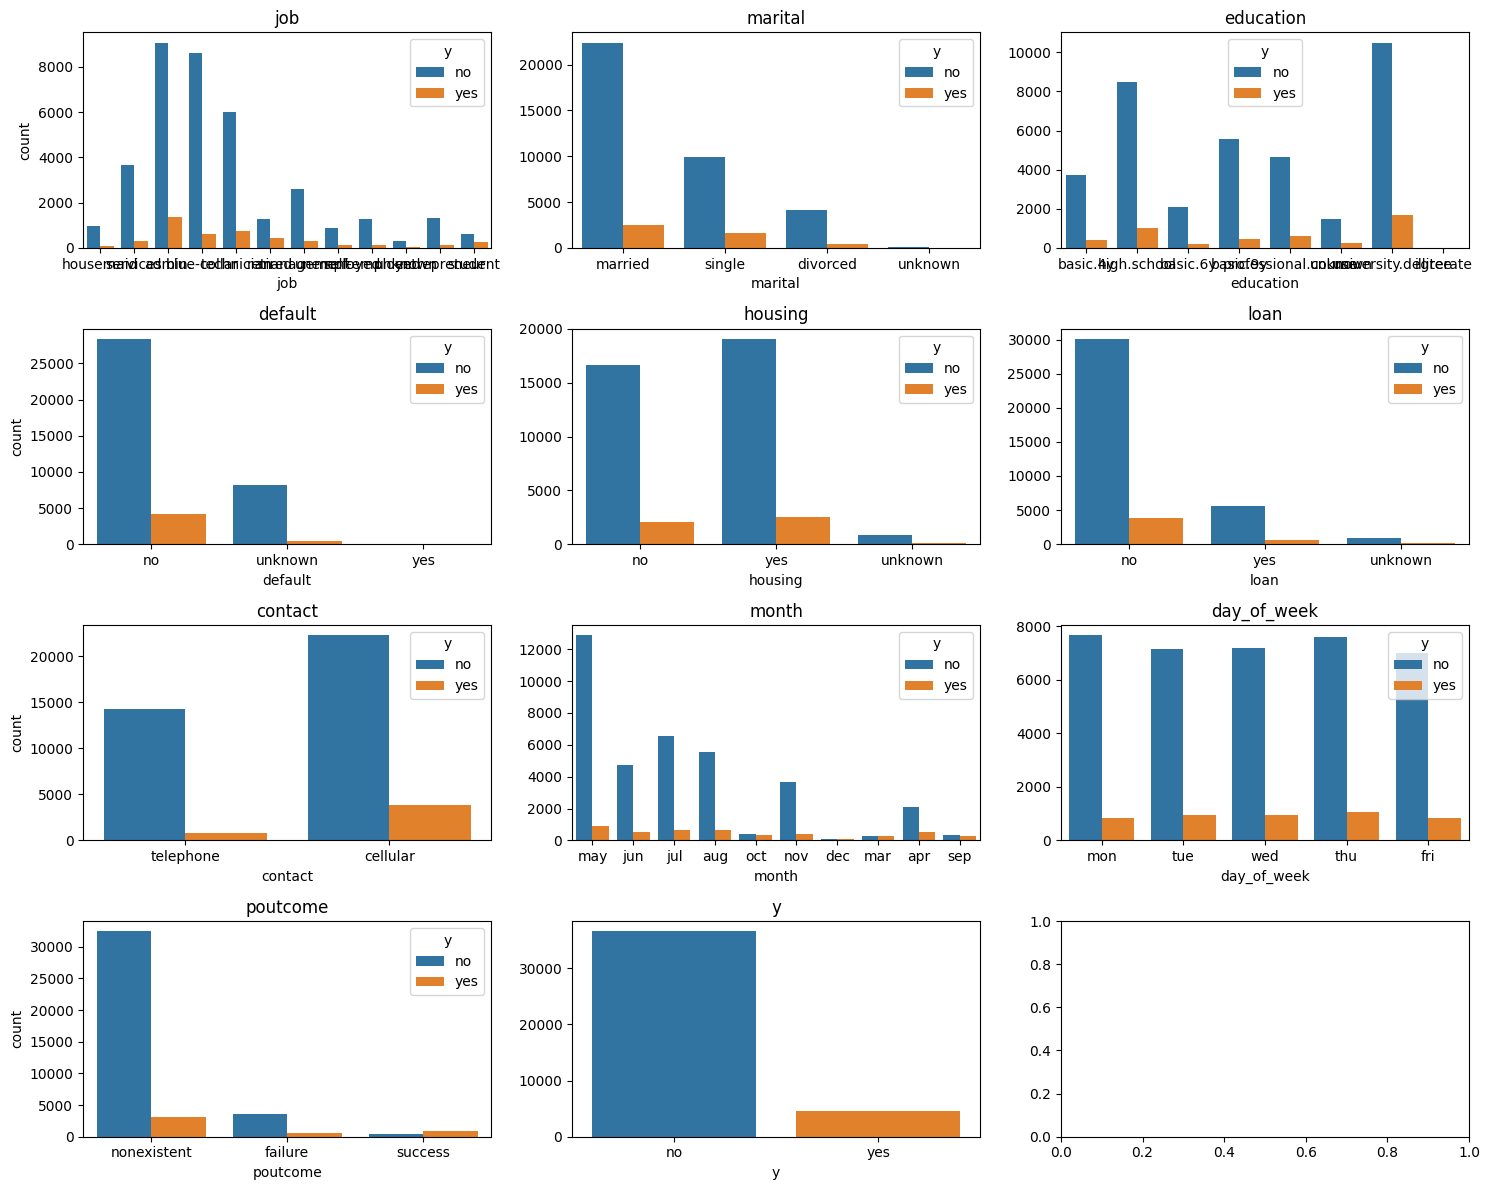

In [7]:
columns_to_plot = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

fig, axes = plt.subplots(4, 3, figsize=(15, 12))  # Adjusted for 11 plots
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    if i < len(columns_to_plot):
        sns.countplot(ax=axes[i], data=fred, x=column, hue='y') #using y as hue
        axes[i].set_title(column)
        if i % 3 != 0:
            axes[i].set(ylabel=None)
    else:
        fig.delaxes(axes[i]) #remove unused axes

plt.tight_layout()
plt.show()

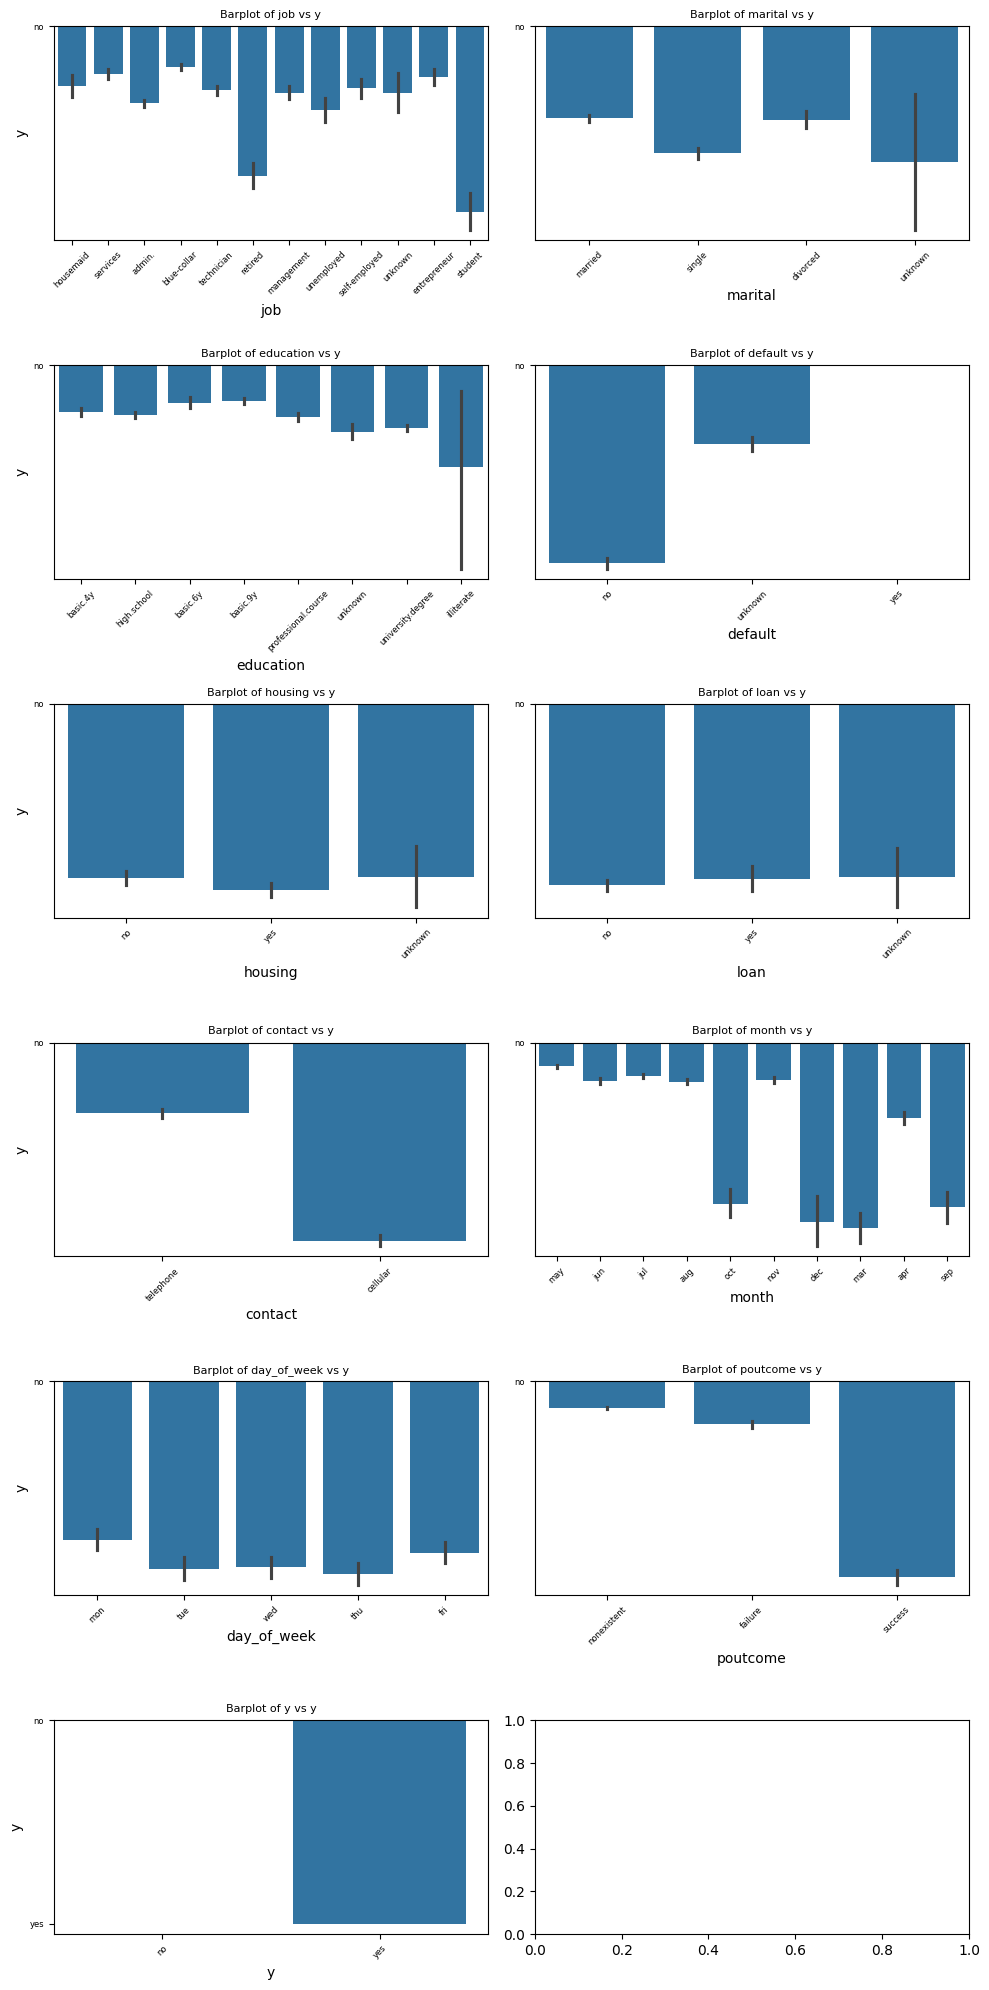

In [8]:
columns_to_plot = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

fig, axes = plt.subplots(6, 2, figsize=(10, 20))  # Adjusted figsize for smaller plots
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    if i < len(columns_to_plot):
        sns.barplot(ax=axes[i], data=fred, x=column, y='y')
        axes[i].set_title(f'Barplot of {column} vs y', fontsize=8)  # Smaller title
        axes[i].tick_params(axis='x', rotation=45, labelsize=6)  # Rotated and smaller x-labels
        axes[i].tick_params(axis='y', labelsize=6)  # Smaller y-labels
        if i % 2 != 0:
            axes[i].set(ylabel=None)
    else:
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


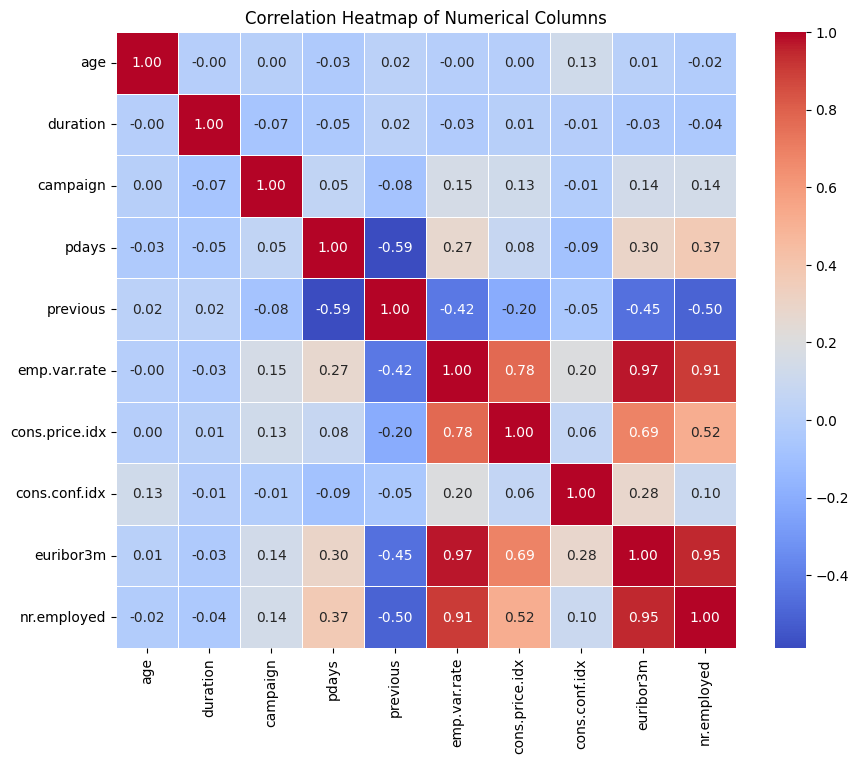

In [9]:
columns_to_plot = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Calculate the correlation matrix
correlation_matrix = fred[columns_to_plot].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# List of columns to encode (all the categorical columns in your dataset)
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                      'contact', 'month', 'day_of_week', 'poutcome', 'y']

# Apply label encoding to each categorical column
for column in categorical_columns:
    fred[column] = le.fit_transform(fred[column])


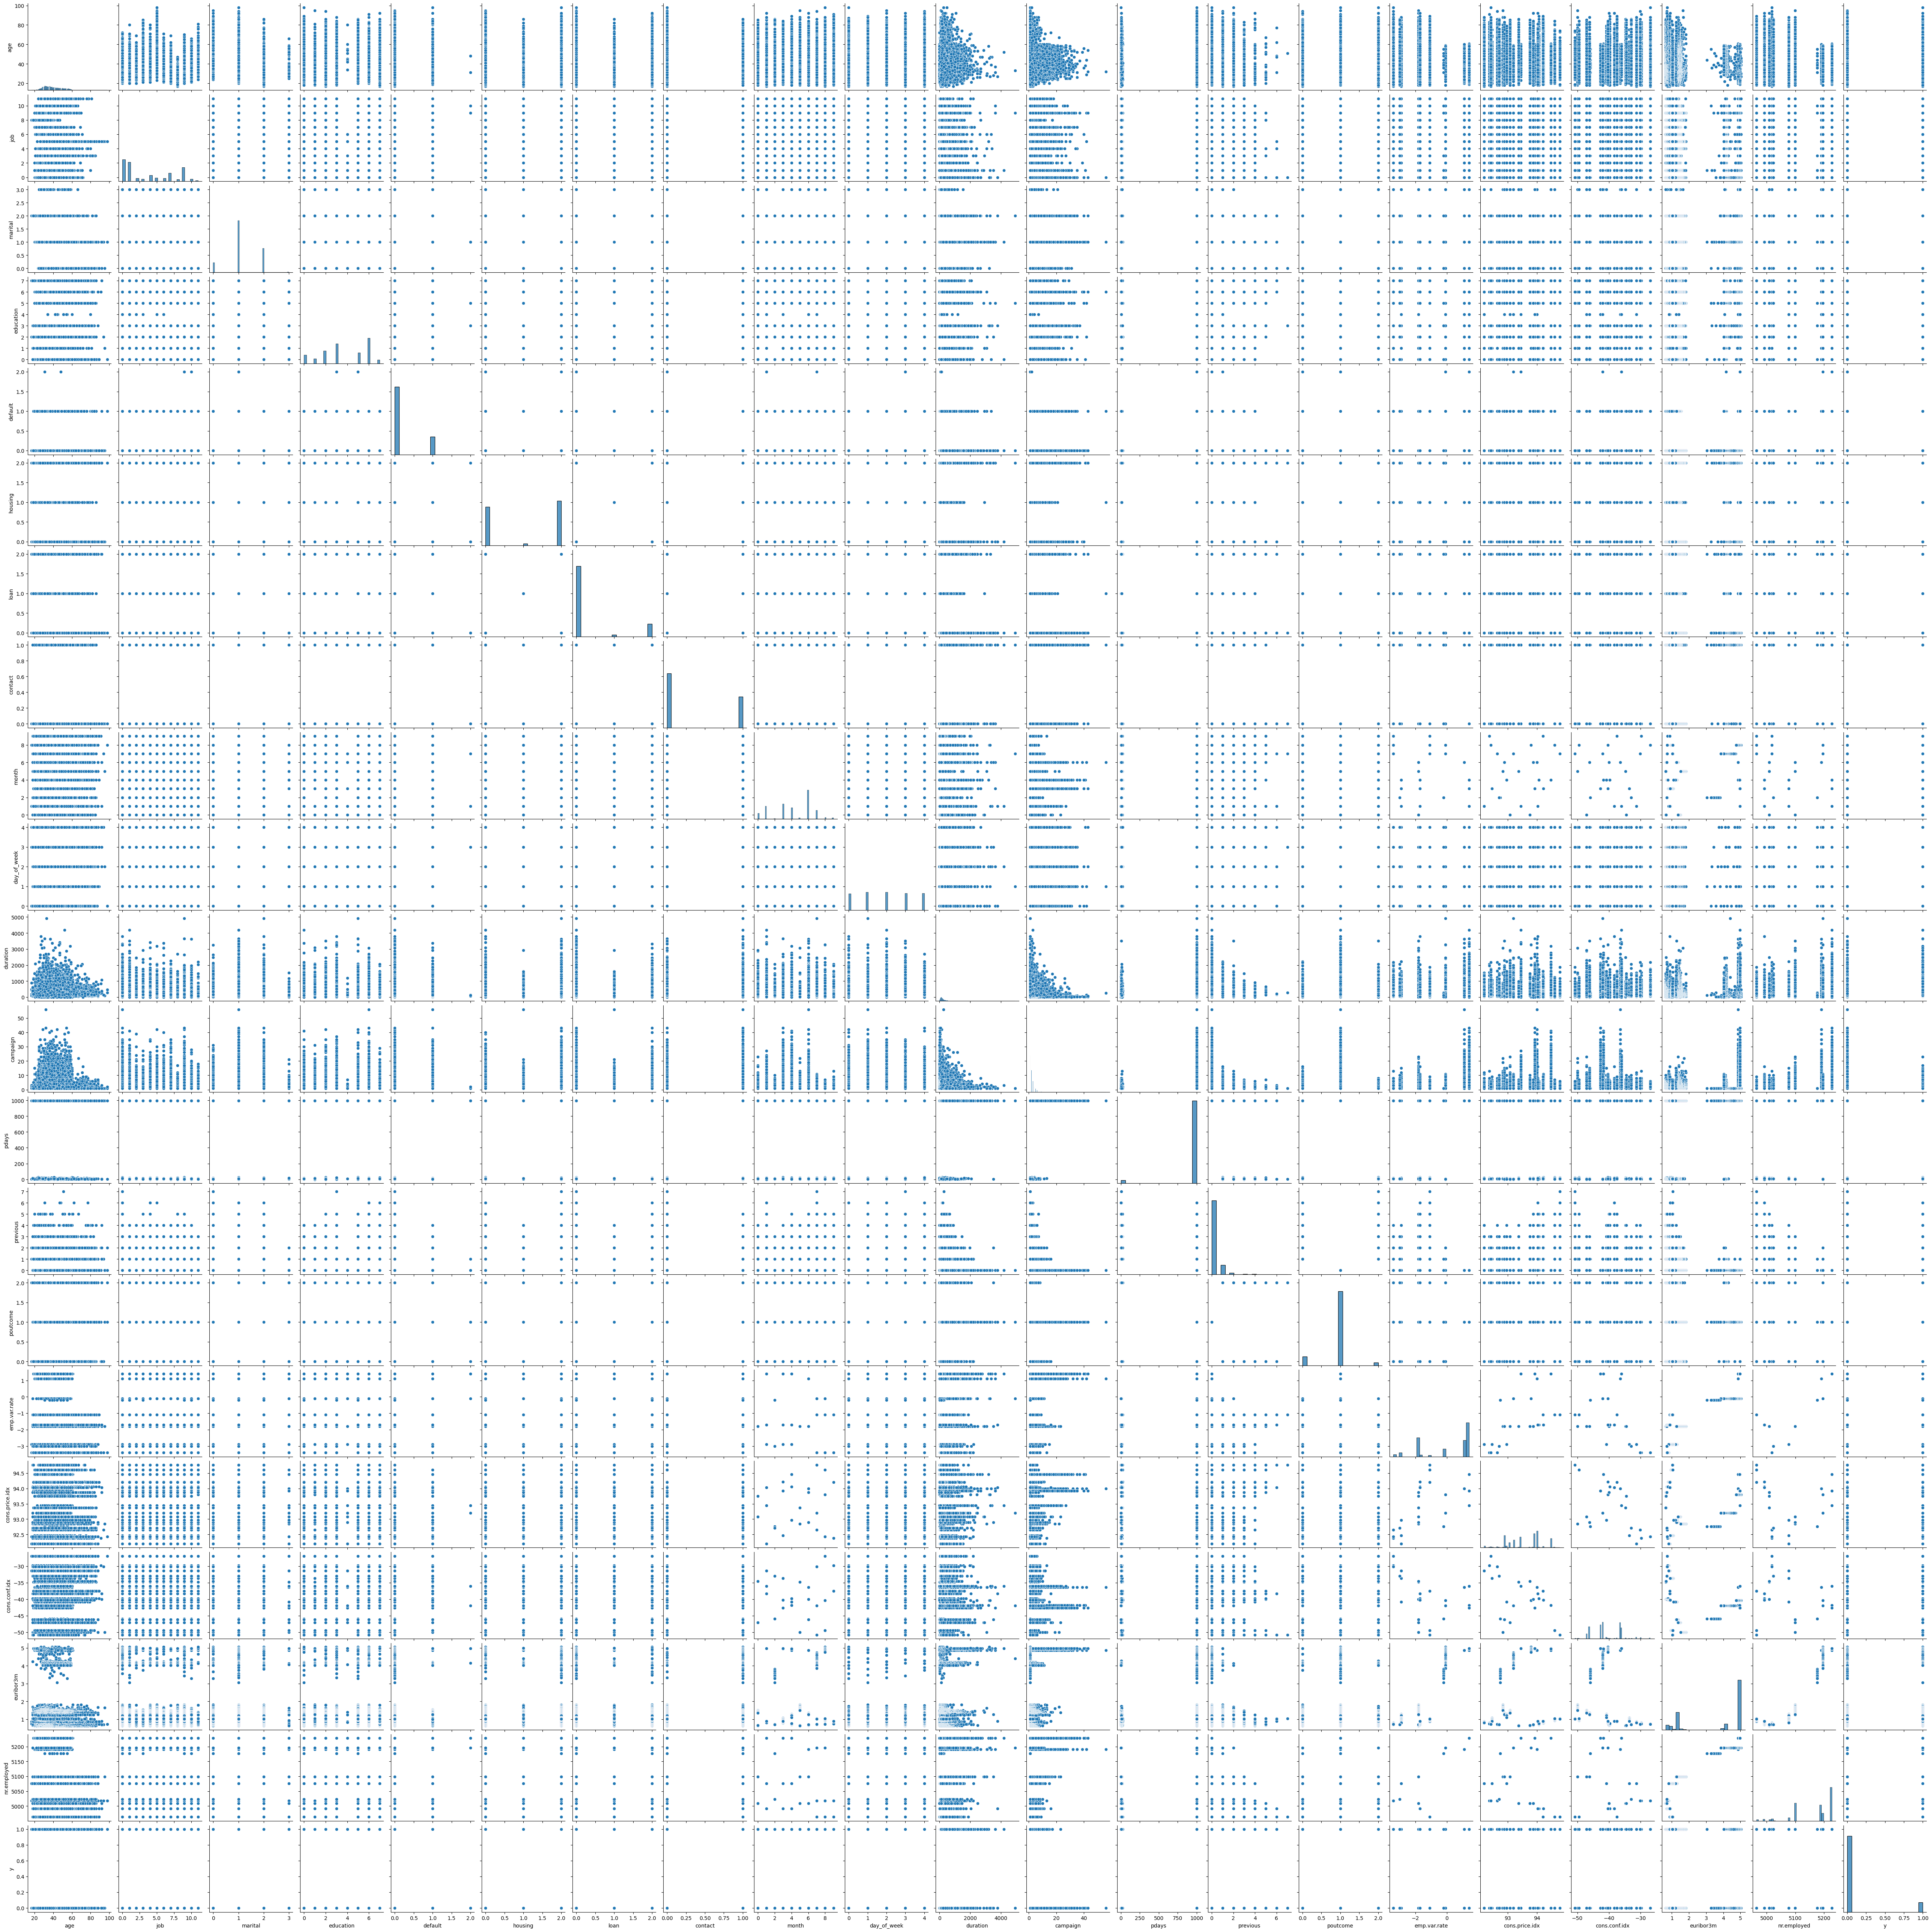

In [19]:
sns.pairplot(data = fred)

In [21]:
from sklearn.model_selection import train_test_split

num_variables = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

# Split the data into features (X) and target (y)
X = fred[num_variables]  # Select numerical columns
y = fred["y"]  # Assuming 'y' is your target column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the first few rows of the training feature matrix
print(X_train.head())

       age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
12556   40        94         2    999         0           1.4          93.918   
35451   31       116         4    999         0          -1.8          92.893   
30592   59        13         6    999         1          -1.8          92.893   
17914   43        94         5    999         0           1.4          93.918   
3315    39       344         2    999         0           1.1          93.994   

       cons.conf.idx  euribor3m  nr.employed  
12556          -42.7      4.960       5228.1  
35451          -46.2      1.244       5099.1  
30592          -46.2      1.354       5099.1  
17914          -42.7      4.961       5228.1  
3315           -36.4      4.860       5191.0  


In [22]:
from sklearn.preprocessing import StandardScaler

num_variables = ["age", "duration", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

X = fred[num_variables]
y = fred["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_variables, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_variables, index=X_test.index)

print(X_train_scaled.head())


            age  duration  campaign     pdays  previous  emp.var.rate  \
12556 -0.001669 -0.631114 -0.206242  0.194661 -0.350902      0.838794   
35451 -0.864095 -0.546321  0.513676  0.194661 -0.350902     -1.199440   
30592  1.819007 -0.943306  1.233593  0.194661  1.677559     -1.199440   
17914  0.285806 -0.631114  0.873635  0.194661 -0.350902      0.838794   
3315  -0.097494  0.332441 -0.206242  0.194661 -0.350902      0.647709   

       cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
12556        0.589080      -0.472769   0.771354     0.843165  
35451       -1.180760      -1.229916  -1.372028    -0.939748  
30592       -1.180760      -1.229916  -1.308581    -0.939748  
17914        0.589080      -0.472769   0.771930     0.843165  
3315         0.720307       0.890097   0.713674     0.330405  


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression
logistic_model = LogisticRegression(random_state=42)  # Initialize the model
logistic_model.fit(X_train_scaled, y_train)  # Train the model

# Predictions
y_pred = logistic_model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9090798737557659
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.66      0.40      0.50       935

    accuracy                           0.91      8238
   macro avg       0.80      0.69      0.73      8238
weighted avg       0.90      0.91      0.90      8238

Confusion Matrix:
[[7114  189]
 [ 560  375]]


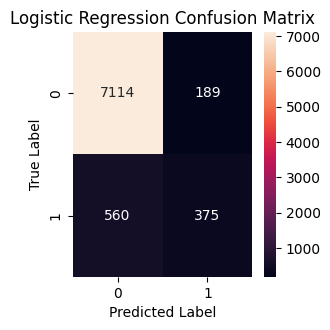

In [26]:
fred_cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(fred_cm)

plt.figure(figsize=(3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=True)
plt.tight_layout()
plt.title("Logistic Regression Confusion Matrix") #Added a title
plt.xlabel("Predicted Label") #Added x label
plt.ylabel("True Label") #added y label
plt.show()

In [33]:
model_grid = LogisticRegression(penalty = "l1", C = 10, solver = "liblinear")
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9094440398154892